<a href="https://colab.research.google.com/github/raghavadevarajeurs/DeepLearning/blob/main/Assignment3/Assignment3_PartC3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building 3 layer Neural Network using pure Tensorflow tensor with high level primitives

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Layer, Dense
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

#Generating sample data for 3d input and 2d output

In [3]:
def get_true_labels(X, weights_true, bias_true):
  return tf.matmul(X ** 2, weights_true, transpose_b=True) + tf.matmul(X, weights_true, transpose_b=True) + tf.transpose(bias_true)

In [4]:
n_samples = 150
input_dim = 3
output_dim = 2

tf.random.set_seed(123)
X = tf.random.uniform((n_samples, input_dim), -1, 1)
print('Sample X: ' + str(X[:2]))

weights_true = tf.constant([[5., 1., 3.], [2., 1., 1.]], dtype=tf.float32)
bias_true = tf.constant([[1], [1]], dtype=tf.float32)

y_true = get_true_labels(X, weights_true, bias_true)
print('Sample y: ' + str(y_true[:2]))

Sample X: tf.Tensor(
[[-0.7476938   0.14550257 -0.4013734 ]
 [ 0.09236717  0.44103146  0.5779066 ]], shape=(2, 3), dtype=float32)
Sample y: tf.Tensor(
[[-0.49738383  0.54910517]
 [ 4.875683    2.7492206 ]], shape=(2, 2), dtype=float32)


#Drawing the 3 Dimensional data plot

In [5]:
def plot_3d(title, X, y, y_pred=None):
  X_tnse = TSNE(n_components=2, random_state=123).fit_transform(X)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_tnse[:,0], X_tnse[:,1], y, label='y_true')
  ax.set_title(title)
  if y_pred is not None:
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred, label='y_pred', marker='v')
  plt.legend()
  plt.show()

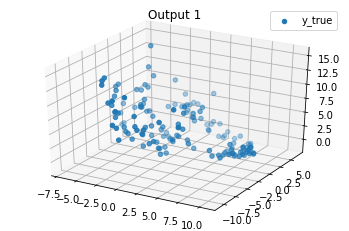

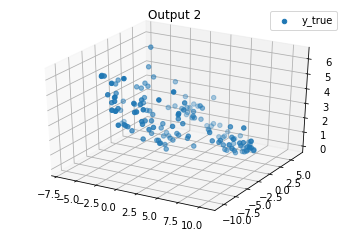

In [6]:
plot_3d('Output 1', X, y_true[:,0])
plot_3d('Output 2', X, y_true[:,1])

#Building Nueral Network

In [9]:
class NeuralNet(tf.keras.Model):
  def __init__(self, num_inputs=3, num_hidden=[2], num_outputs=2, activation=None, **kwargs):
    super(NeuralNet, self).__init__(**kwargs)
    self.num_inputs = num_inputs
    self.num_hidden = num_hidden
    self.num_outputs = num_outputs

    layers_nodes = [self.num_inputs] + self.num_hidden + [self.num_outputs]
    
    layers = []
    for i in range(len(layers_nodes[:-1])):
      if i == len(layers_nodes[:-1]) - 1:
        layers.append(Dense(layers_nodes[i + 1]))
      else:
        layers.append(Dense(layers_nodes[i + 1], activation=activation))

    self.layers_ = layers

  def forward(self, x):
    curr_out = X
    for layer in self.layers_:
      curr_out = layer(curr_out)
    return curr_out
  
  def call(self, inputs):
    curr_out = X
    for layer in self.layers_:
      curr_out = layer(curr_out)
    return curr_out
  
  def fit(self, X, y_true, lr, epochs):
    loss_fn  = tf.keras.losses.MeanSquaredError()
    optimizer = tf.keras.optimizers.Adam()
    for epoch in range(epochs):
      with tf.GradientTape(persistent=True) as tape:
        y_pred = self.forward(X)
        error = loss_fn(y_pred, y_true)
        print(error)

      for layer in self.layers:
        gradients = tape.gradient(error, layer.trainable_weights)
        optimizer.apply_gradients(zip(gradients, layer.trainable_weights))

#HyperParameters

In [13]:
epochs = 500
lr = 0.01

n_inputs = X.shape[1]
n_outputs = y_true.shape[1]

#Training NN with ReLU activation function

In [14]:
model = NeuralNet(num_inputs=n_inputs, num_hidden=[4, 3], num_outputs=n_outputs, activation='relu')
print('Neural Network Architecture:')
print(model.layers)
print()

model.fit(X, y_true, lr, epochs)

y_pred = model.forward(X)
err = mean_squared_error(y_true, y_pred)
print('Final Error: {}'.format(err))

Neural Network Architecture:
[<tensorflow.python.keras.layers.core.Dense object at 0x7f6a5e8cd090>, <tensorflow.python.keras.layers.core.Dense object at 0x7f6a5e866510>, <tensorflow.python.keras.layers.core.Dense object at 0x7f6a5e866910>]

tf.Tensor(19.188848, shape=(), dtype=float32)
tf.Tensor(19.168102, shape=(), dtype=float32)
tf.Tensor(19.148333, shape=(), dtype=float32)
tf.Tensor(19.127419, shape=(), dtype=float32)
tf.Tensor(19.105074, shape=(), dtype=float32)
tf.Tensor(19.081232, shape=(), dtype=float32)
tf.Tensor(19.055853, shape=(), dtype=float32)
tf.Tensor(19.02892, shape=(), dtype=float32)
tf.Tensor(19.000366, shape=(), dtype=float32)
tf.Tensor(18.970419, shape=(), dtype=float32)
tf.Tensor(18.939173, shape=(), dtype=float32)
tf.Tensor(18.906565, shape=(), dtype=float32)
tf.Tensor(18.8728, shape=(), dtype=float32)
tf.Tensor(18.837994, shape=(), dtype=float32)
tf.Tensor(18.802275, shape=(), dtype=float32)
tf.Tensor(18.765673, shape=(), dtype=float32)
tf.Tensor(18.728487, shape

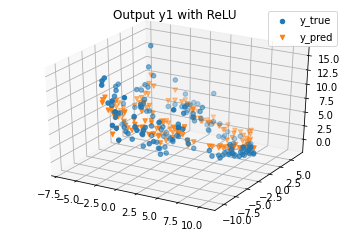

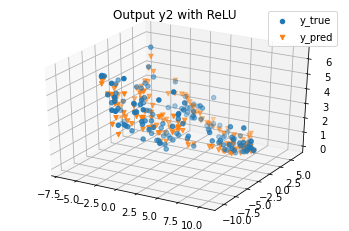

In [15]:
plot_3d('Output y1 with ReLU', X, y_true[:,0], y_pred[:,0])
plot_3d('Output y2 with ReLU', X, y_true[:,1], y_pred[:,1])

#Training NN without any activation function


In [16]:
model = NeuralNet(num_inputs=n_inputs, num_hidden=[4, 3], num_outputs=n_outputs, activation=None)
print('Neural Network Architecture:')
print(model)
print()

model.fit(X, y_true, lr, epochs)

y_pred = model.forward(X)
err = mean_squared_error(y_true, y_pred)
print('Final Error: {}'.format(err))

Neural Network Architecture:

tf.Tensor(19.40298, shape=(), dtype=float32)
tf.Tensor(19.365484, shape=(), dtype=float32)
tf.Tensor(19.332191, shape=(), dtype=float32)
tf.Tensor(19.297535, shape=(), dtype=float32)
tf.Tensor(19.260763, shape=(), dtype=float32)
tf.Tensor(19.22167, shape=(), dtype=float32)
tf.Tensor(19.180202, shape=(), dtype=float32)
tf.Tensor(19.136402, shape=(), dtype=float32)
tf.Tensor(19.090353, shape=(), dtype=float32)
tf.Tensor(19.04216, shape=(), dtype=float32)
tf.Tensor(18.99196, shape=(), dtype=float32)
tf.Tensor(18.939886, shape=(), dtype=float32)
tf.Tensor(18.886093, shape=(), dtype=float32)
tf.Tensor(18.830725, shape=(), dtype=float32)
tf.Tensor(18.773924, shape=(), dtype=float32)
tf.Tensor(18.715832, shape=(), dtype=float32)
tf.Tensor(18.656576, shape=(), dtype=float32)
tf.Tensor(18.59628, shape=(), dtype=float32)
tf.Tensor(18.535051, shape=(), dtype=float32)
tf.Tensor(18.472988, shape=(), dtype=float32)
tf.Tensor(18.410185, shape=(), dtype=float32)
tf.Tensor

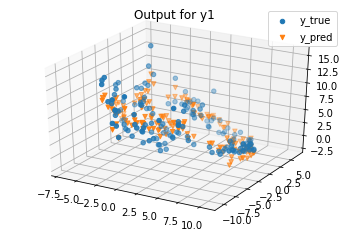

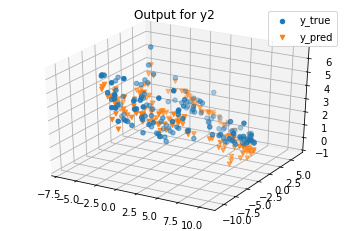

In [18]:
plot_3d('Output for y1', X, y_true[:,0], y_pred[:,0])
plot_3d('Output for y2', X, y_true[:,1], y_pred[:,1])